# Анализ продаж компьютерных игр

В моем распоряжении имеются следующие данные из открытых источников до декабря 2016 года: 
- доступны исторические данные о продажах игр;
- оценки пользователей и экспертов;
- жанры и платформы (например, Xbox или PlayStation). 
Мне нужно выявить определяющие успешность игры закономерности. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель исследования:
Подготовить данные к проведению анализа.
Провести исследовательский анализ данных:
1. Узнать сколько игр выпускалось в разные годы;
2. Узнать, как менялись продажи по платформам;
3. Узнать, какие платформы лидируют по продажам, растут или падают;
4. Узнать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
5. Проверить, как распределяются игры по жанрам;
6. Составить портрет пользователя каждого региона.
Осуществить проверку следующих гипотез:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные. 

### Ход исследоавния:

Данные представлены в файле `games.csv`.
Файл содержит следующую информацию:
- в столбце Name — название игры;
- в столбце Platform — платформа;
- в столбце Year_of_Release — год выпуска;
- в столбце Genre — жанр игры;
- в столбце NA_sales — продажи в Северной Америке (миллионы проданных копий);
- в столбце EU_sales — продажи в Европе (миллионы проданных копий);
- в столбце JP_sales — продажи в Японии (миллионы проданных копий);
- в столбце Other_sales — продажи в других странах (миллионы проданных копий);
- в столбце Critic_Score — оценка критиков (максимум 100);
- в столбце User_Score — оценка пользователей (максимум 10);
- в столбце Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

О качестве данных ничего не известно, поэтому сначала необходимо провести обзор данных.
Я проверю данные на ошибки, пропуски и дубликаты, оценю их влияние на исследование. 

Затем на этапе предобработки данных я попробую исправить все ошибки, которые не приведут к искажению конечного результата. Приведу названия столбцов к нижнему ригистру, в случае необходимости изменю тип данных столбцов  обработаю пропуски, там где это возможно, добавлю новый столбец в который добавлю данные о суммарных продажах во всех регионах.

Далее проведу исследовательский анализ данных, посмотрю, сколько игр выпускалось в разные годы, опишу важность этих данных, проведу анализ продаж в зависимости от платформы, определю актуальный период, на основе которого можно будет построить прогноз на 2017 год,выявлю лидирующие платформы по продажам, визуализирую информацию по глобальным продажам в разбивке по платформам, а также по продажам внутри одной платформы, определю есть ли зависимость между продажами и отзывами и построю соответсвующие графики, изучу данные о продажах игр по жанрам.

Далее определю для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5), самые популярные жанры (топ-5), и выясню влияет ли рейтинг ESRB на продажи в отдельном регионе и приступлю к проверке гипотез.


Таким образом, мое исследование пройдет в 12 этапов:
- обзор данных;
- предобработка данных;
- подсчет суммарных продажах во всех регионах;
- изучение количества выпуска игр по годам;
- анализ продаж в зависимости от платформы;
- определение актуального периода для построения прогноза;
- построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам;
- построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами;
- анализ общего распределения игр по жанрам;
- построение портрека пользователя каждого региона;
- проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
- проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные?

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd # импортирую библиотеку pandas
from scipy import stats as st # импортирую модуль stats из библиотеки scipy
import seaborn as sns  # импортирую библиотеку seaborn
import math # импортирую библиотеку math
import numpy as np # импортирую библиотеку numpy
import matplotlib.pyplot as plt # импортирую библиотеку matplotlib.pyplot

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')  # читаю csv-файл
except:
    df = pd.read_csv('C:\\Users\\1\\Desktop\\учеба\\python\\Сборный проект 1\\games.csv')  # читаю csv-файл

In [3]:
display(df.head(10)) # вывожу на экран первые 10 строк таблицы df
df.info()  # вывожу на экран общую информацию о таблице df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.isna().sum() # подсчитаю количество пропущенных значений

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

При выводе на экран первых строк таблицы `df` с помощью метода `head()` и общей информации о ней с помощью метода `info()` я вижу, что в таблицу присутсвуют пропущенные значения, с помощью методов `isna()` и `sum()` я подсчитала количество пропущенных значений и вижу большое количество пропусков в столбцах с оценкой игр. Также имеется необходимость изменить наименования столбцов, привести их нижнему регистру.
Столбец `User_Score` необходимо привести к типу `float`, т.к. в нем указываются числовые показатели.

<div style="border:solid orange 2px; padding: 20px">   
    
**Вывод:**
Данные полученные для исследования требуют предобработки:
- необходимо привести к нижнему регистру наименования столбцов всех столбцов;
- столбец `User_Score` привести к типу данных `float`;
- провести проверку на явные дубликаты, при необходимости обработать их;
- обработать пропуски, без ущерба данным.
    
    
Пропуски в столбцах `Critic_Score`, `User_Score` и `Rating` не получится заменить средним занчением или медианной, т.к. это может повлиять на общий вывод исследования. Для удобства работы с таблицей заменю пропуски в этих столбцах на "нереальные" значения. Все пустые строки в столбцах `Critic_Score` и `User_Score` заменю на "-1", т.к. отрицательного рейтинга нет, а пропуски в столбце `Rating` заменю на "No ESRB", т.к. в этом столбце указан рейтинг установленный именно этой организацией.
    Столбец `Year_of_Release` также имеет пропуски, но их не много. Средним или медианой их нельзя заполнить, но т.к. пропусков немного оставлю их как есть, имеющихся данных мне должно хватить для анализа.

#### Шаг 2. Предобработка данных

Пререименую столбцы, для этого воспользуюсь методом `lower()` и приведу все названия столбцов к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df # выведу на экран обновленную таблицу

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Выведу список уникальных значений столбца `user_score`. Для этого воспользуюсь методом `unique()`

In [7]:
df['user_score'].unique() # нахожу уникальные значения

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Я вижу в столбце значения `tbd`, они мешают изменению типа данных.
Посмотрю сколько таких значений в таблице, для этого выведу на экран строки в которых значение в столбце user_score равно tbd

In [8]:
df.loc[df['user_score'] == 'tbd'] # вывожу необходимые строки на экран

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Строк почти 2.5 тысячи, достаточно большое количество.

Поискав в интернете я выяснила, что аббревиатура tbd( с англ. 'to be determined' - 'будет определено') Данной аббревиатурой в Америке обозначают игры для которых не достаточно данных для определения их рейтинга, следовательно это тот же NaN.

Заменю значения tbd в столбце user_score на "NaN". Для этого воспользуюсь методом `replace()`

In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

Приведу столбец `user_score` к типу данных `float`

In [10]:
df['user_score'] = df['user_score'].astype(float) # заменяю тип на float

Заменю пропуски в столбцах `critic_score`, `user_score` и `rating` на соответсвующие значения. Для этого воспользуюсь методом `fillna()`

In [11]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna('No ESRB')

Снова воспользуюсь методами `isna()` и `sum()` и посчитаю количесво пропусков после обработки данных

In [12]:
df.isna().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

У меня осталось небольшое количество пропусков, но это не критично и обрабатывать их дальше не вижу смысла.

Создам новый столбец `total_sales` и запишу в него суммарные продажи во всех регионах. Для этого просто сложу столбцы `na_sales`, `eu_sales`, `jp_sales` и `other_sales`

In [13]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [14]:
df # выведу на экран обновленную таблицу

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No ESRB,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No ESRB,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,No ESRB,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,No ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,No ESRB,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,No ESRB,0.01


Проведу проверку на явные дубликаты. Для этого воспользуюсь методами `duplicated()` и `sum()` и выведу на экран количество дубликатов.

In [15]:
df.duplicated().sum()

0

<div style="border:solid orange 2px; padding: 20px">   
    
**Вывод:**
В ходе предобработки данных я привела названия столбцов к нижнему регистру, произвела замену пустых значений на "нереальные" для упрощения последующей работы с данными, произвела проверку на наличие явных дубликатов (их нет, всё отлично). Также я добавила новый столбец с суммарными данными о продажах во всех регионах.

#### Шаг 3. Исследовательский анализ данных

##### Рассмотрю, сколько игр выпускалось в разные годы. Определю важны ли данные за все периоды?

Сгруппирую данные по году выхода игры и узнаю количество игр выпущенных в том или ином году. Для этого воспользуюсь методом `groupby` 

In [16]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Визуализирую данные, построю гистограмму с помощью метода `hist()` 

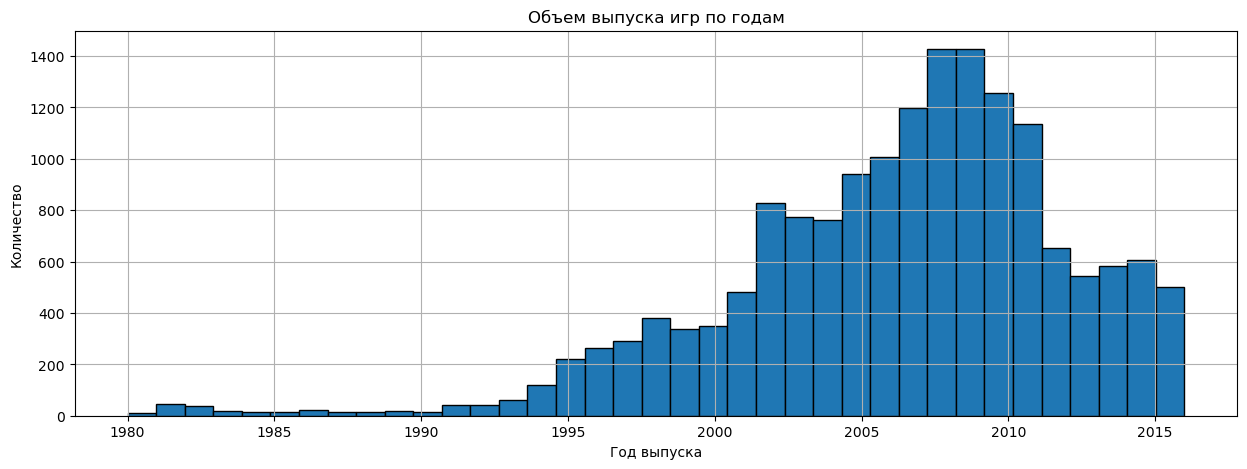

In [17]:
df.hist(column='year_of_release', ec='black', bins=37, figsize =(15, 5))
plt.title('Объем выпуска игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.show()

В результате анализа я выявила, что до 1994 года игр выпускалось очень мало. Начиная с 1994 года и до 2001 года наблюдается постепенный рост количества выпускаемых игр. В 2002 году я вижу всплеск производства игр, показатели увеличились почти в 2 раза, возможно это связано с выпуском новых процессоров и увеличения производительности компьютеров, а также их большей доступности для геймеров. Так до 2011 года наблюдается рост выпуска игр, а вот дальше я вижу спад. Возможно появление и широкое распространение мобильных устройств способствовали уменьшению интереса к компьютерным играм, а возможно дело в повышении требований к компьютерним играм, что увеличивает срок их разработки и как следствие уменьшает количество релизов.

##### Узнаю, как менялись продажи по платформам. Мне необходимо выбрать платформы с наибольшими суммарными продажами, построить распределение по годам и определить за какой характерный срок появляются новые и исчезают старые платформы?

Для начала сгруппирую данные по платформе и узнаю количество игр выпущенных на той или иной платформе. Для этого воспользуюсь методом `groupby` 

In [18]:
df.groupby('platform')['name'].count().sort_values(ascending=False)

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: name, dtype: int64

Визуализирую данные, построю гистограмму с помощью метода `plot` 

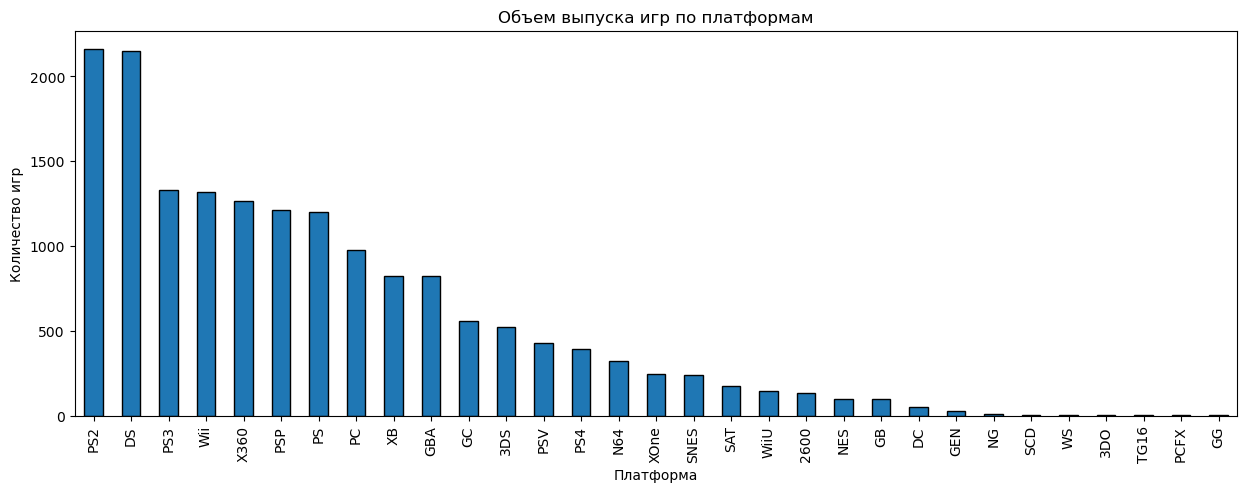

In [19]:
df.groupby('platform')['name'].count().sort_values(ascending=False).plot(kind='bar', ec='black', figsize =(15, 5))
plt.title('Объем выпуска игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество игр')
plt.show()

Я вижу, что больше всего игр выпускалось для платформы PS2 и DS, их показатели почти равны и сильно выделяются на фоне остальных платформ. Затем идут платформы PS3, Wii и X360. 

Cгруппирую данные по платформе и узнаю объемы продаж по каждой платформе. Для этого воспользуюсь методом `groupby` 

In [20]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

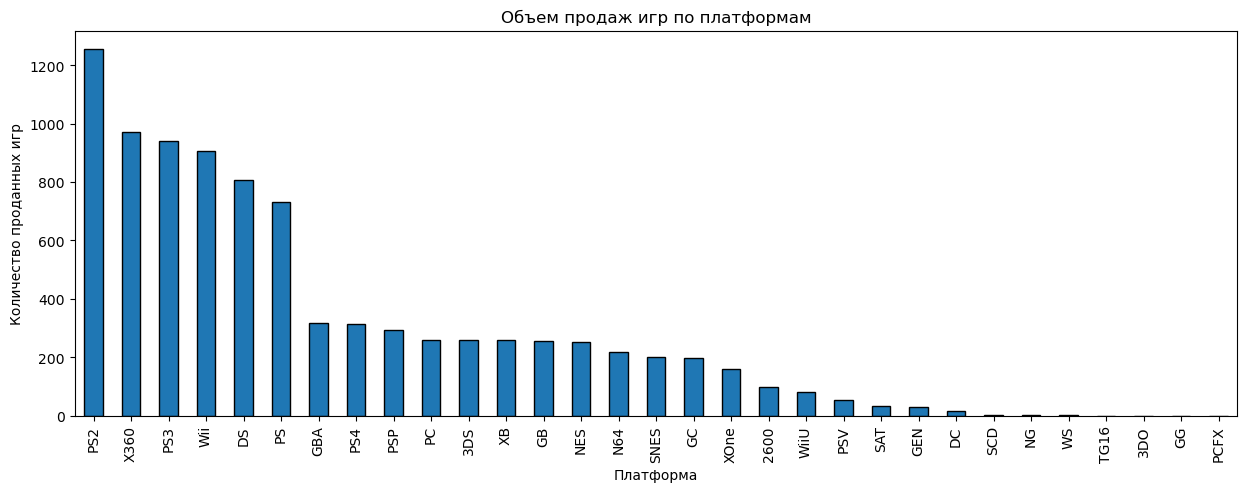

In [21]:
platform_sales.plot(kind='bar', ec='black', figsize =(15, 5))
plt.title('Объем продаж игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных игр')
plt.show()

Я вижу 6 платформ продажи которых значительно отличаются от остальных. На первом месте PS2, они лидируют как по количеству выпускаемых игр, так и по объему продаж. Затем идут X360, PS3, Wii, DS и PS. Их мы и выделим для дальнейшего анализа.

Построю распределение по годам, узнаю как менялись продажи у выделеных мною платформ. За какой характерный срок появляются новые и исчезают старые платформы?

Для начала создам список с платформами выбранными мною для последующего анализа. 

In [22]:
top_sales = list(platform_sales.index[:6])
top_sales # выведу список на экран

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Создам сводную таблицу и визуализирую результат, для этого воспользуюсь методом `pivot_table()`, а затем с помощью `plot()` построю график

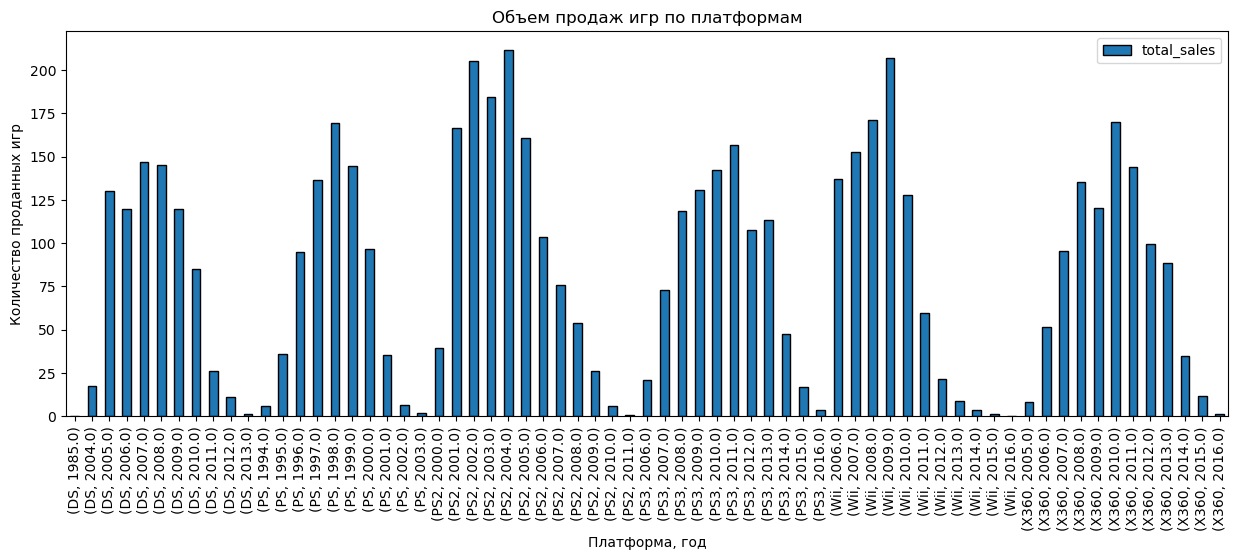

In [23]:
pd.pivot_table(
    df.query('platform == @top_sales'), index=['platform', 'year_of_release'], 
    values='total_sales', aggfunc='sum').plot(kind='bar', ec='black', figsize =(15, 5))
plt.title('Объем продаж игр по платформам')
plt.xlabel('Платформа, год')
plt.ylabel('Количество проданных игр')
plt.show()

По данному графику можно отследить объемы продаж каждой платформы по годам, но я попробую визуализировать иначе.
Немного изменю код сводной таблицы, добавлю параметр `columns` и выведу на экран новый график.

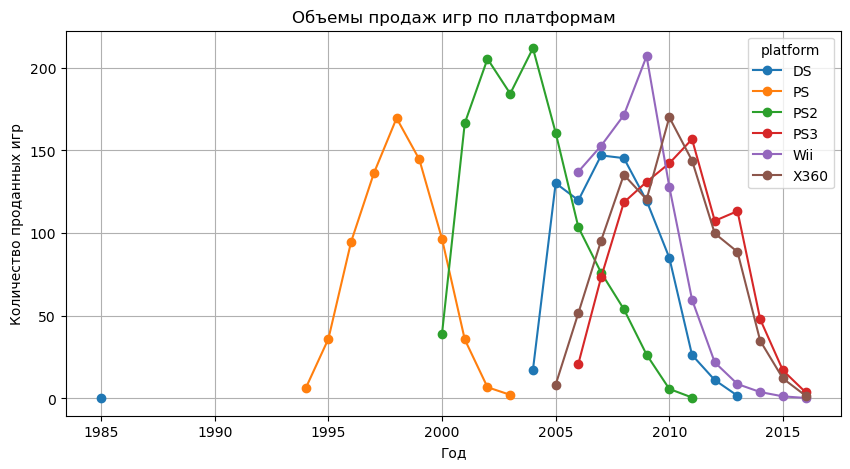

In [24]:
pd.pivot_table(
    df.query('platform == @top_sales'), 
    index='year_of_release', columns='platform', 
    values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 5), style='o-'
)
plt.title('Объемы продаж игр по платформам')
plt.xlabel('Год')
plt.ylabel('Количество проданных игр')
plt.show()

Построю такой же график, но удалив значения до 1990 года.

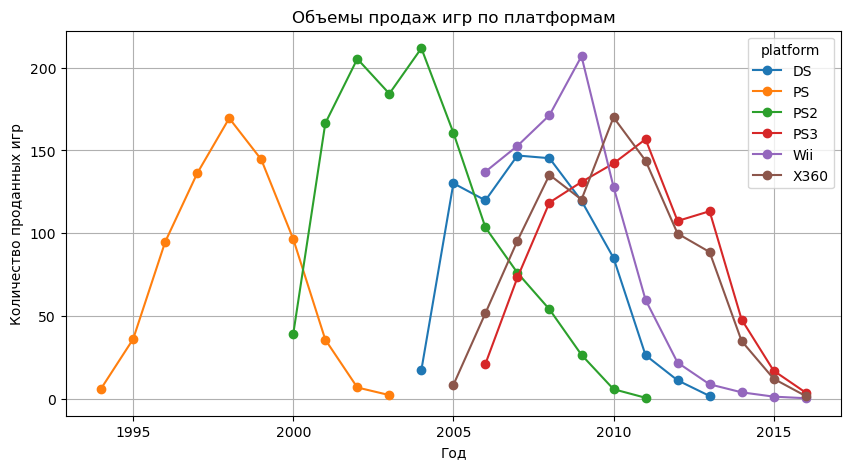

In [25]:
df_other = df.loc[df['year_of_release']>=1990]
pd.pivot_table(
    df_other.query('platform == @top_sales'), 
    index='year_of_release', columns='platform', 
    values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 5), style='o-'
)
plt.title('Объемы продаж игр по платформам')
plt.xlabel('Год')
plt.ylabel('Количество проданных игр')
plt.show()

Такой график, на мой взгляд более читаемый.

И так, по графикам, я вижу следующее:
- PS2 "прожила" с 2000 по 2011 год, всего 11 лет;
- X360 была популярна c 2005 по 2016 год, также 11 лет;
- PS3 с 2006 по 2016 год, срок жизни 10 лет;
- Wii с 2006 по 2016 год, также 10 лет;
- DS с 2004 года по 2013 год была популярна, 8 лет продаж игр;
- PS с 1994 по 2003 год, 9 лет продажи игр.

Я могу сделать вывод, что в среднем продолжительность жизни данных платформ составляет 10 лет, затем они устаревают и теряют свою популярность и актуальность.

##### Теперь возьмем актуальный период и проведем анализ данных


За актуальный период возьмем данные за последние 3 года с 2014 по конец 2016 года.


Создадим новую таблицу из которой удалим все данные за период до 2014 года.

In [26]:
df_current = df.loc[df['year_of_release'] >= 2014]

In [27]:
df_current.info() # выведу общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.5+ KB


На основе новой таблицы созам сводную таблицу и выведу ее значения на графике. Для этого таже используем методы `pivot_table` и `plot`

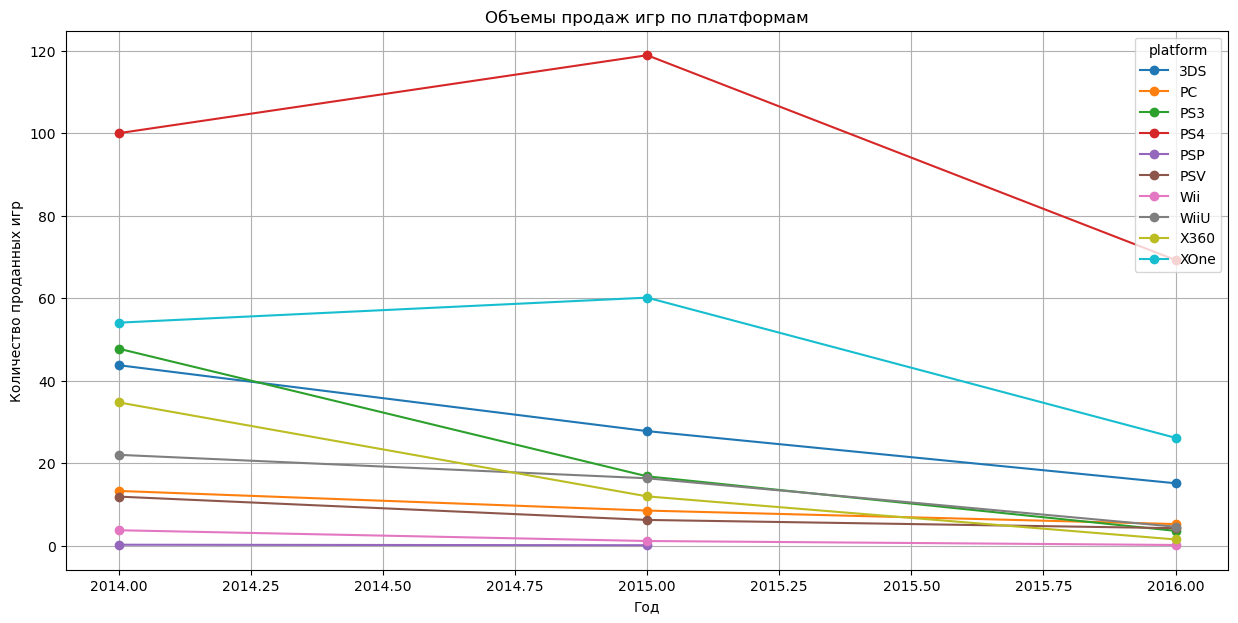

In [28]:
pd.pivot_table(
    df_current, 
    index='year_of_release', columns='platform', 
    values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7), style='o-'
)
plt.title('Объемы продаж игр по платформам')
plt.xlabel('Год')
plt.ylabel('Количество проданных игр');

Исходя из данного графика я могу выделить 3 платформы лидирующие по числу продаж:
- PS4, платформа появившаяся в 2013 году;
- XOne, появилась также в 2013 году;
- 3DS, появилась в 2011 году.

На графике виден общий спад продаж в игровой индустрии.
Эти платформы лидируют по продажам, однако на фоне общего спада их показатели уменьшаются.
Наиболее прибыльными на мой взгляд в 2017 году будут платформы PS4 и XOne, либо следующие, более новые модели платформ.

Далее необходимо построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам и описать результат.

Для построение данного графика возьму топ-5 платформ из актуального периода.

In [29]:
platform_sales_current = df_current.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_current = list(platform_sales_current.index[:5])
top_current

['PS4', 'XOne', '3DS', 'PS3', 'X360']

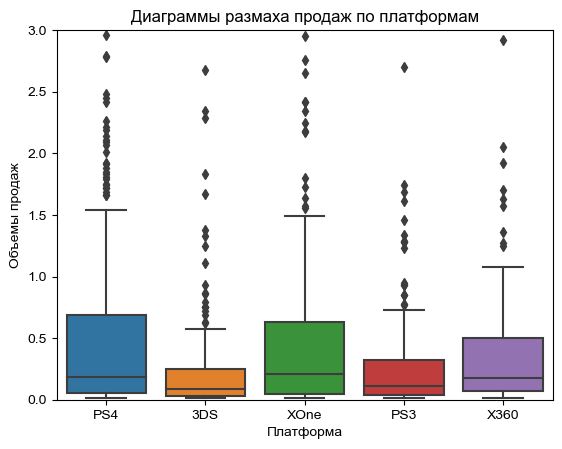

In [30]:
sns.boxplot( data=df_current.query('platform==@top_current'), x='platform',y='total_sales');
sns.set(rc={'figure.figsize':(10, 10)})
plt.ylim(0, 3)
plt.title('Диаграммы размаха продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объемы продаж');

По диаграмме размаха я вижу, что медиана для большенства платформ находится в пределах 0.1 млн. проданных копий игр. Медиана по топовым платформам варьируется от 0,2 до 0,25 млн. копий проданных игр. Также вижу большое количество выбросов, видимо это "выстрелившие" в свое время игры.  

Теперь посмотрм, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Для анализа возьмем платформу PS4, т.к. она лидирует по числу продаж на конец 2016 года и по ней есть достаточное для анализа количество данных. 

Для этого создадим новую таблицу и внесем в нее данные из актуальной таблицы содержащие строки с платформрй PS4 и оценкой критиков  и пользователей более 0 и назовем ее `ps_4`.

In [31]:
ps_4 = df_current[(df_current['platform'] == 'PS4') & (df_current['critic_score'] >= 0) & (df_current['user_score'] >= 0)]

Построю диаграмму рассеяния, чтобы найти связь между оценками критиков и количеством продаж

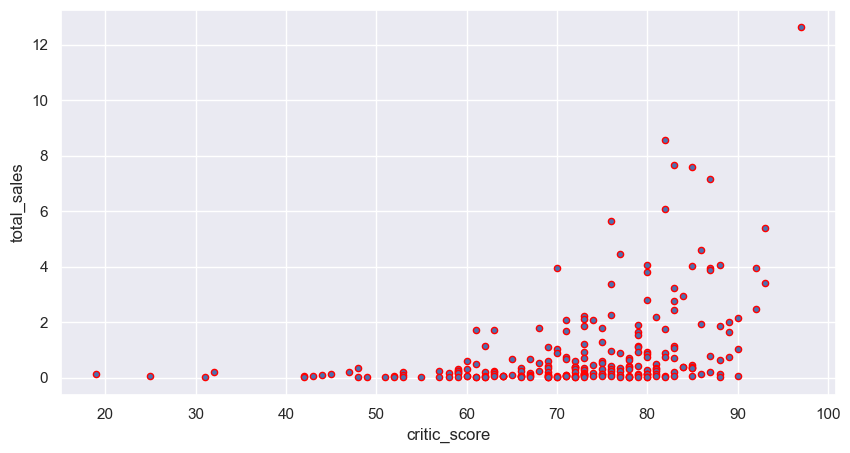

Коэфицент корреляции продаж игр на PS4 от оценок критиков равен 0.40190287811475334


In [32]:
ps_4.plot(x='critic_score', y='total_sales', kind='scatter', ec='red', figsize=(10,5))
plt.show()
print('Коэфицент корреляции продаж игр на PS4 от оценок критиков равен', ps_4['total_sales'].corr(ps_4['critic_score']))

С увеличением среднего рейтинга критиков увеличивается и средний уровень количества продаж копий игр, что логично: чем качественнее игра, тем больше она продается.

Построю диаграмму рассеяния, чтобы найти связь между оценками пользователей и количеством продаж и выведу на экран корреляцию

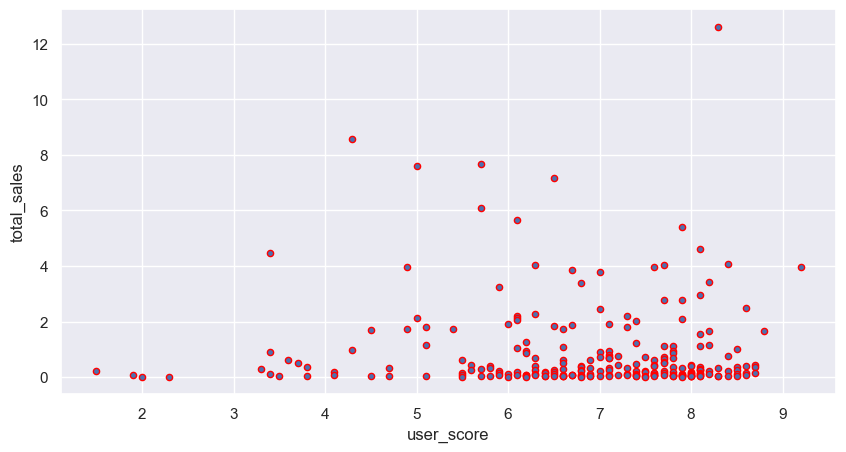

Коэфицент корреляции продаж игр на PS4 от оценок пользователей равен -0.04318585997193634


In [33]:
ps_4.plot(x='user_score', y='total_sales', kind='scatter', ec='red', figsize=(10,5))
plt.show()
print('Коэфицент корреляции продаж игр на PS4 от оценок пользователей равен', ps_4['total_sales'].corr(ps_4['user_score']))

Здесь я вижу, что оценки пользователей не особо влияют на продажи, т.к есть игры с высокими оценками и не большим количеством продаж и наоборот, имеются игры с низкими оценками, но при этом хорошо продающиеся, даже присутствует небольшая отрицательная корреляция. В общем логично, пользователь, чтобы составить оценку должен сначала пробрести игру.

**Вывод:** Оценка пользователей не влияет на количество продаж. Оценка критиков в данном случае имеет большее влияние.

Теперь посмотрим корреляцию на других платформах и сравним данные.
Возьмем платформы XOne, 3DS, X360 и PS3 и выведем для них корреляции продаж от отзывов

In [34]:
XOne = df_current[(df_current['platform'] == 'XOne') & (df_current['critic_score'] >= 0) & (df_current['user_score'] >= 0)]
print('Коэфицент корреляции продаж игр на XOne от оценок критиков равен', XOne['total_sales'].corr(XOne['critic_score']))
print('Коэфицент корреляции продаж игр на XOne от оценок пользователей равен', XOne['total_sales'].corr(XOne['user_score']))

Коэфицент корреляции продаж игр на XOne от оценок критиков равен 0.4221118510555765
Коэфицент корреляции продаж игр на XOne от оценок пользователей равен -0.09173434503310748


In [35]:
_3DS = df_current[(df_current['platform'] == '3DS') & (df_current['critic_score'] >= 0) & (df_current['user_score'] >= 0)]
print('Коэфицент корреляции продаж игр на 3DS от оценок критиков равен', _3DS['total_sales'].corr(_3DS['critic_score']))
print('Коэфицент корреляции продаж игр на 3DS от оценок пользователей равен', _3DS['total_sales'].corr(_3DS['user_score']))

Коэфицент корреляции продаж игр на 3DS от оценок критиков равен 0.28468579095782925
Коэфицент корреляции продаж игр на 3DS от оценок пользователей равен 0.2798498792503281


In [36]:
X360 = df_current[(df_current['platform'] == 'X360') & (df_current['critic_score'] >= 0) & (df_current['user_score'] >= 0)]
print('Коэфицент корреляции продаж игр на X360 от оценок критиков равен', X360['total_sales'].corr(X360['critic_score']))
print('Коэфицент корреляции продаж игр на X360 от оценок пользователей равен', X360['total_sales'].corr(X360['user_score']))

Коэфицент корреляции продаж игр на X360 от оценок критиков равен 0.5257228356581523
Коэфицент корреляции продаж игр на X360 от оценок пользователей равен 0.3365136248359934


In [37]:
PS3 = df_current[(df_current['platform'] == 'PS3') & (df_current['critic_score'] >= 0) & (df_current['user_score'] >= 0)]
print('Коэфицент корреляции продаж игр на PS3 от оценок критиков равен', PS3['total_sales'].corr(PS3['critic_score']))
print('Коэфицент корреляции продаж игр на PS3 от оценок пользователей равен', PS3['total_sales'].corr(PS3['user_score']))

Коэфицент корреляции продаж игр на PS3 от оценок критиков равен 0.44657460493190704
Коэфицент корреляции продаж игр на PS3 от оценок пользователей равен 0.1565951618135996


**Вывод:** По результам вывода показателей корреляции по разным платформам я пришла к выводу, что не зависимо от платформы общая суть не меняется, оценки пользователей фактически не влияют на продаваемость игры, а оценки критиков могут внести свой вклад в продажи, но я не назвала бы их значительным показателем для продаж.

##### Посмотрю на общее распределение игр по жанрам. 

Для этого сгруппирую данные по жанру и выведу количество выпущенных игр и обшее количество продаж по жанрам. Буду использовать метод `groupby()`

In [38]:
genre = df_current.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False)
genre = genre.rename(columns={'name':'count'}) # переименую название столбца
genre # выведем таблицу на экран

,count,total_sales
genre,,
Action,619,199.36
Shooter,128,170.94
Sports,161,109.48
Role-Playing,221,101.44
Misc,113,37.55
Fighting,60,28.22
Racing,69,27.52
Platform,38,18.09
Adventure,185,17.55


Нарисую столбчатую диаграмму с количеством игр и количеством проданных копий игр. Для этого с помощью метода `plot()` создам две диаграммы и объединю их на общей плоскости.

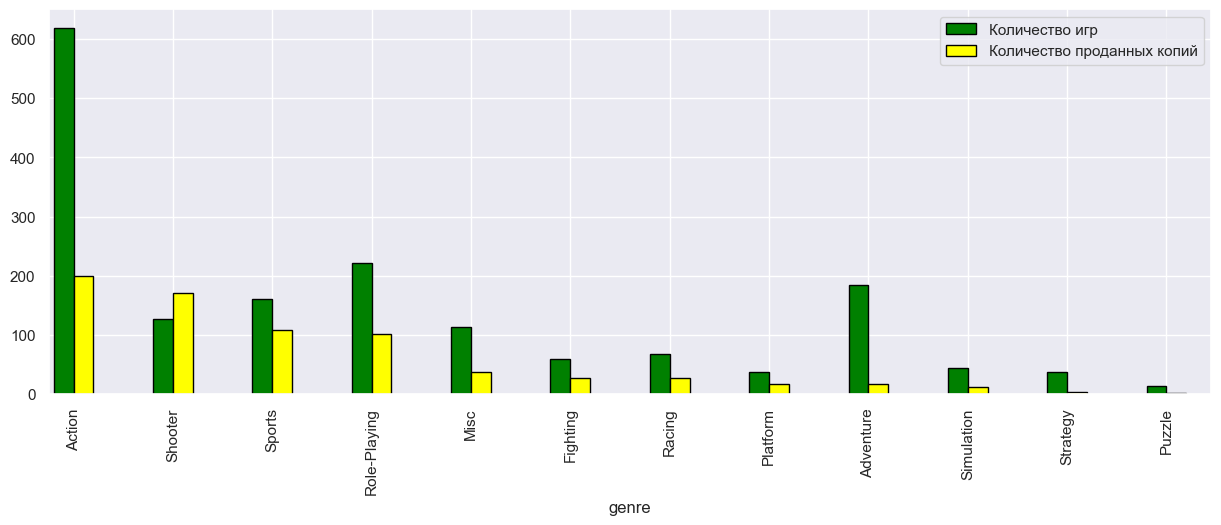

In [39]:
ax = plt.gca()

plot1 = genre['count']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='green', position=1)

plot2 = genre['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='yellow', position=0)

ax.legend(['Количество игр', 'Количество проданных копий']);

Проведу группировку данных по медиане общих продаж.

In [40]:
genre_median = df_current.groupby('genre').agg({'name': 'count', 'total_sales': 'median'}).sort_values(by='total_sales', ascending=False)
genre_median = genre_median.rename(columns={'name':'count'}) # переименую название столбца
genre_median # выведем таблицу на экран

,count,total_sales
genre,,
Shooter,128,0.515
Sports,161,0.180
Platform,38,0.140
Fighting,60,0.125
Role-Playing,221,0.110
Simulation,44,0.100
Action,619,0.090
Misc,113,0.090
Racing,69,0.090


По результатам группировки вижу, что шутеры заняли первое место, а вот экшен игры опустились аж на 7 позицию.

Больше всего было издано и продано игр жанра Action. Затем идут игры жанра Sport. Игр в жанре Sport выпущено гораздо меньше, чем игр в жанре Action, однако количество продаж не сильно уступает.  Меньше всего издано игр в жанрах Strategy, Puzzle и Platform. 

Меньше всего продаж игр у жанров Strategy, Puzzle и Adventure(не сморя на достаточно большое количество изданных игр, видимо совсем не популярный жанр). 

Самым прибыльным жанром я бы назвала Shooter, т.к. соотношение количества изданных игр идет почти 1 в 1 с количеством проданных копий (не забываем, что копии в таблице считаются миллионами), ну и естественно жанры Sport и Action(хоть при подсчете по медиане продаж он сбросил позиции, тем не менее таких игр выпускают очень много и сумарно они продаются хорошо), также следует обратить внимание на игры жанра Platform, их не много, но продаются они хорошо.


<div style="border:solid orange 2px; padding: 20px">   
    
**Вывод:**
В ходе проведения исследовательского анализа я выявила, в 2002 году было большое увеличение производства игр, показатели увеличились почти в 2 раза, по сравнению с предыдущим периодом. После 2011 года наблюдается спад производства. Пик выпуска игр приходится на 2007 - 2008 года.
    
Я определила 6 платформ лидеров по продажам игр, это PS2, X360, PS3, Wii, DS, PS, построила график и определила, что средняя продолжительность жизни платформы около 10 лет, затем они устаревают и теряют свою популярность и актуальность.
    
Актуальным периодом я выбрала перод с 2006 по 2016 год, данные за более рание периоды с учетом развития технологий считаю не актуальными для данного проекта.
    
В актуальном периоде я на основе графика определила, что потенциально прибыльными платформами являются PS4б XOne и 3DS. Это относительно свежие платформы с высокими показателями продаж на конец 2016 года.

Я построила диаграмму размаха я вижу и определила, что медиана для большенства платформ находится в пределах 0.1 млн. проданных копий игр. Медиана по топовым платформам варьируется от 0,2 до 0,25 млн. копий проданных игр.
    

В результате проведенного анализа на примере платформы PS4 я выявила, что оценка пользователей не влияет на количество продаж., а оценка критиков может влиять на продажи.
Затем я провела анализ корреляци по другим платформам и утвердилась в мнении, что оценки не сильно влияют на продажи, оценки критиков влияют в чуть большей степени, оценки пользователей не влияют.
    
После распределения игр по жанрам я определила, что большим спросом пользуются игры в жанрах Shooter, Sport и  Action(в виду своей численности), а таже игры в жанре Platform, это наиболее перспективные направления рынка. Наименьшим спросом пользуются игры в жанрах Strategy, Puzzle и Adventure.

#### Шаг 4. Составление портрета пользователя каждого региона

Мне необходимо определить для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5);
- самые популярные жанры (топ-5);
- влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для составления портрета пользователя каждого региона напишу собственную функцию для группировки данных и последующего построения круговых диаграмм

In [41]:
# задаю название функции
def top_in_regions_plot(groupby, region_sales, ax):
    # группирую данные
    pivot = df_current.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    # задаю названия графиков
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    # задаю цвет графиков
    color_dict = {'na_sales': 'blue', 'eu_sales': 'green', 'jp_sales': 'orange'}
    # строю диаграмму
    plot = pivot.plot(kind = 'pie', y = region_sales, autopct = '%1.0f%%', figsize=(20, 20), title = title_dict[region_sales],
                      ax=axes[ax])
    plot.legend(loc=2, prop={'size':8})
    plot.set_xlabel('')
    plot.title.set_size(20)

Выведу графики самых популярных платформ по регионам, для этого воспользуюсь функцией `top_in_regions_plot`

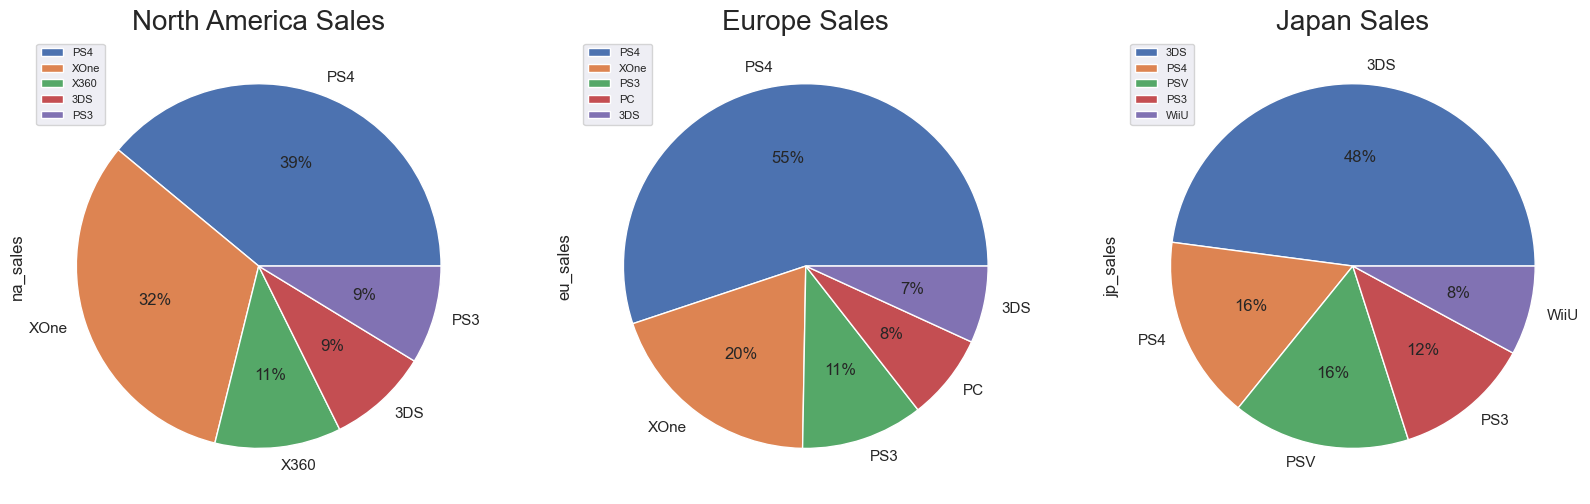

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(25,5)) # обозначу размер и размещение графиков

top_in_regions_plot('platform', 'na_sales', 0) 
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В Северной Америке наиболее популярны платформы PS4 и XOne, они занимают больше 60% рынка.  

В Европе самой популярной платформой является PS4, 55% рынка. За ним XOne и PS3.

В Японии наибольшую популярность имеют платформы японского происхождения. Лидер - 3DS - 48% рынка, за ним идет PS4 и PSV и они занимают по 16% рынка. 

Теперь выведу графики самых популярных жанров по регионам.

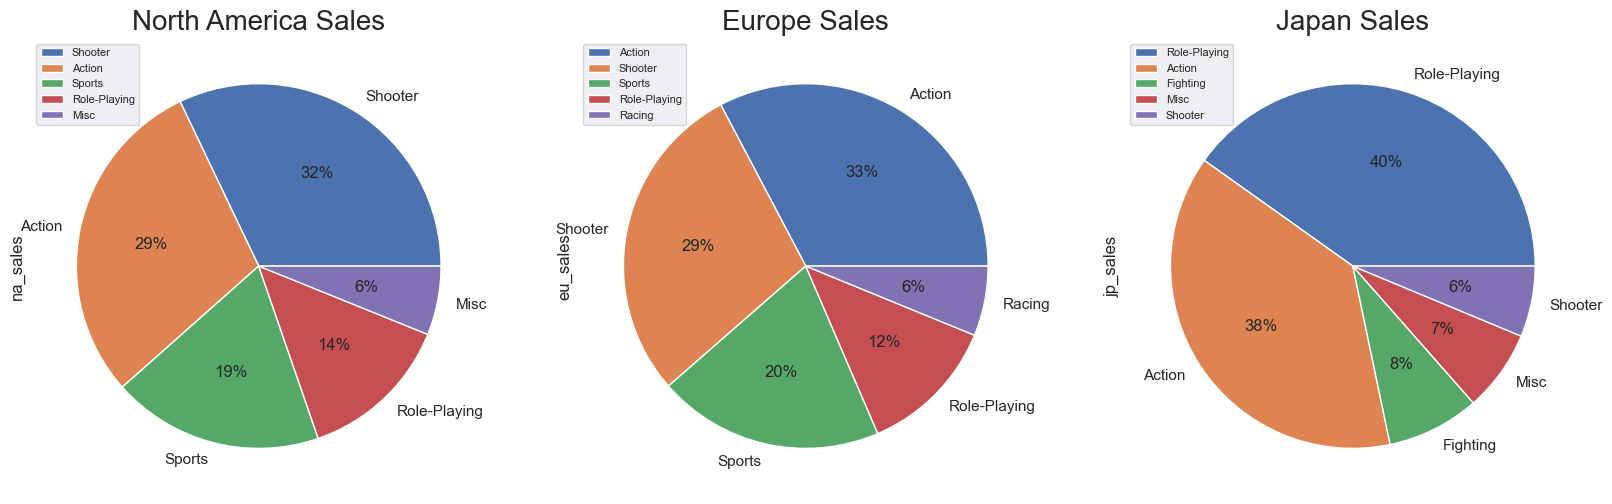

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(25,5))   # обозначу размер и размещение графиков

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

В Северной Америке и Европе схожие предпочтения у игроков, наиболее популярными являются жанры Action, Sports и Shooter, они занимаю более 70% рынка. В Японии самым популярным жанров является Role-Playing, он занмает 40% рынка, за ним  следует жанр Action, который занимает 38% рынка.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для начала отметим, что система рейтинга ESRB используется по большей части в США. С помощью данной системы обозначают возрастные ограничения в играх.

Выведу графики самых популярных рейтингов по регионам.

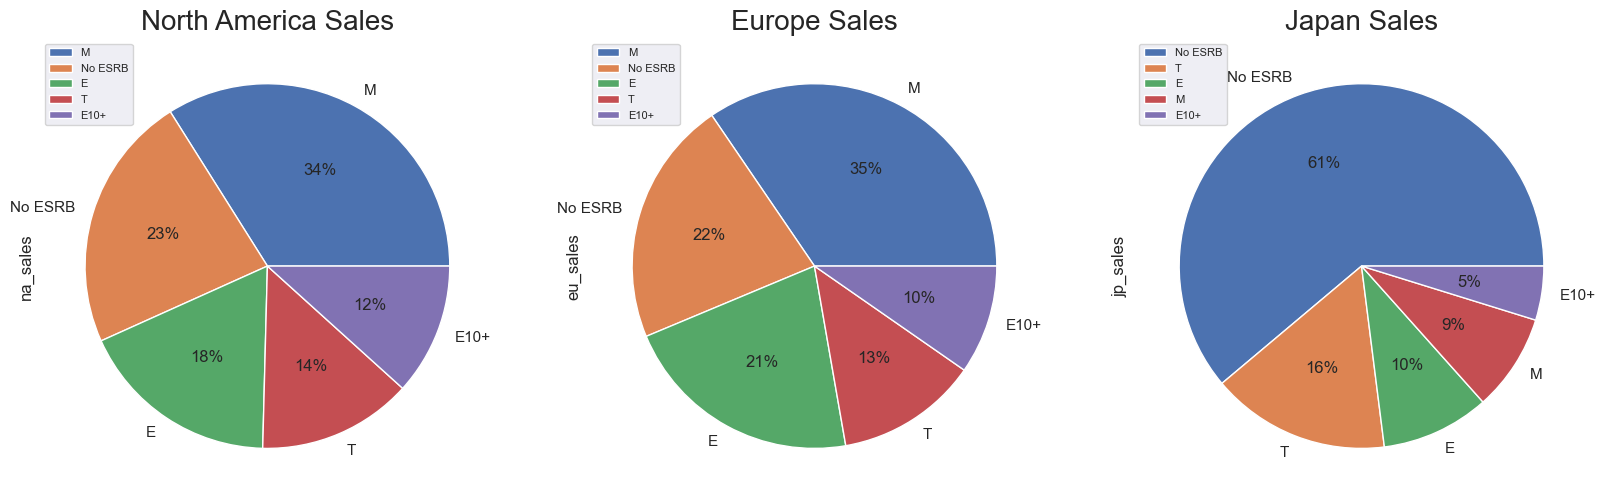

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(25,5))   # обозначу размер и размещение графиков

top_in_regions_plot('rating', 'na_sales', 0)
top_in_regions_plot('rating', 'eu_sales', 1)
top_in_regions_plot('rating', 'jp_sales', 2)

По графикам я вижу, что в Северной Америке наиболее распространенный рейтинг рейтиг М (для лиц старше 17 лет), за ним идет 23% игр для которых рейтинг не указан  на третьем месте рейтинг Е (это игры для всех возрастных категорий).
В Европе картина аналогичная.

В Японии 61% рынка занимают игры для который рейтинг ESRB вообще не указан. Затем идут игры с рейтингом Т (для лиц старше 13 лет) и с рейтингом Е (для всех возрастов).

<div style="border:solid orange 2px; padding: 20px">   
    
**Вывод:**
По результатам составления портетов поьзователей каждого региона я могу сделать следующие выводы:
    
Для Северной Америки и Европы - это лица в возрасте старше 17 лет, которые играют в жанрах Action, Sports и Shooter на платформах X360, Wii или PS3.
    
Для Японии более молодая категория пользователей, в среднем 13 - 17 лет, которые играют по большей части в жанрах Role-Playing и Action на платформах DS и 3DS.

#### Шаг 5. Проверка гипотез

1. Проверим первую гипотезу : *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*

Проверить данную гипотезу можно с помощью проверки равенства средних двух генеральных совокупностей, для этого задам нулевую и альтернативную гипотезы: H0 - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". H1 - "Средние пользовательские рейтинги платформ Xbox One и PC разные". Осуществлю проверку гипотезы с помощью метода ttest_ind.

Для этого стоздам 2 переменные в которые внесу свтроки из актуальной таблицы по соответсвующим платформам и пользовательскому рейтингу больше или равно 0.

In [45]:
xone = df_current[(df_current['platform'] == 'XOne')& (df_current['user_score'] >= 0)]
pc = df_current[(df_current['platform'] == 'PC')& (df_current['user_score'] >= 0)]

xone = xone['user_score'] 

pc = pc['user_score']

results = st.ttest_ind(xone, pc)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Тест не отверг нулевую гипотезу, а значит что среднии пользовательские рейтиги платформ Xbox One и PC одинаковые.

2. Проверим вторую гипотезу : *Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

Проверить данную гипотезу можно также с помощью проверки равенства средних двух генеральных совокупностей. Т.к. тест изначально проверяет на равенство то нулевую гипотезу зададим как H0 - "Средние пользовательские рейтинги жанров Action и Sports одинаковые", а в качестве альтернативной гипотезы как раз будем использовать свою основную гипотезу H1 - "Средние пользовательские рейтинги жанров Action и Sports  разные.". Осуществлю проверку гипотезы с помощью метода ttest_ind.

Для этого также стоздам 2 переменные в которые внесу свтроки из актуальной таблицы по соответсвующим жанрам и пользовательскому рейтингу больше или равно 0.

In [46]:
action = df_current[(df_current['genre'] == 'Action')& (df_current['user_score'] >= 0)]
sports = df_current[(df_current['genre'] == 'Sports')& (df_current['user_score'] >= 0)]

action = action['user_score'] 

sports = sports['user_score']

results = st.ttest_ind(action, sports)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Тест отверг нулевую гипотезу в пользу альтернативной, а значит, что средние пользовательские рейтинги жанров Action и Sports  разные, что говорит в пользу выдвинутой изначально гипотезы.

<div style="border:solid orange 2px; padding: 20px">   
    
**Вывод:**
По результатам проведенных тестов я могу сделать следующие выводы:
    
Первыю гипотезу я опровергнуть не смогла, а следовательно средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    
Вторую гипотезу опровергнуть не удалось, следовательно средние пользовательские рейтинги жанров Action и Sports разные.

#### Шаг 6. Общий вывод

<div style="border:solid orange 2px; padding: 20px">   
    
В ходе работы проектом я проанализировала данные, для того, чтобы определить потенциально популярный продукт и спланировать рекламные кампании интернет-магазина «Стримчик» на 2017 год. 
    
Я выяснила, что средня продолжительность актуальности платформы около 10 лет, самыми популярными платформами были 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Затем я определила актуальный период, с 2006 по 2016 год и на основе данных за эти годы проводила дальнейший анализ. В актуальном периоде выявила 3 самые продаваемые платформы на конец 2016 года: PS4, XOne и 3DS. Выяснила, что оценки критиком имею влияние на продажи игр, в отличает от оценок пользователей, тут связи не обнаружилось. Самыми прибыльнымы жанрами являются Shooter, Action, Sport и Platform. Портреты пользователей в Северной Америке и Европе схожи - это лица в возрасте старше 17 лет, которые играют в жанрах Action, Sports и Shooter на платформах PS4 и XOne. В Японии по большей части играют в жанрах Role-Playing и Action на платформах 3DS и PS4. При проверке гипотез первыю гипотезу я не смогла опровергнуть, а следовательно средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и вторую гипотезу опровергнуть не удалось, следовательно средние пользовательские рейтинги жанров Action и Sports разные.
 
    
**В ходе выполнения данного проекта я провела следующую работу:**
- создала датафрейма `df` и добавила в него содержание csv-файла;
- вывела общую информацию, произвела подсчет количества пропусков;
- привела наименования столбцов к нижнему регистру;
- заменила значения `tbd` в столбце `user_score` на `NaN`;
- привела столбец `user_score` к типу данных `float`;
- заменила пропуски в столбцах `critic_score`, `user_score` на "-1", а в столбце `rating` на `No ESRB`;
- создала новый столбец `total_sales` и записала в него суммарные продажи во всех регионах;
- произвела проверку на явные дубликаты;
- сгруппировала данные по году выхода игры и узнала количество игр выпущенных в том или ином году;
- построила гистограмму с помощью метода `hist()` для визуалзации количества игр по годам;
- сгруппировала данные по платформе и узнала количество игр выпущенных на той или иной платформе;
- построила гистограмму с помощью метода `hist()` для визуалзации количества игр по платформам;
- сгруппировала данные по платформе и узнала объем продаж игр на той или иной платформе;
- построила гистограмму с помощью метода `hist()` для визуалзации объема продаж по платформам;    
- создам список топовых платформ для последующего анализа;
- создала сводную таблицу по топовым платформам и вывела на экран график объема продаж игр разбитый по годам и платформам;
- определила актуальный период и сделала срез таблицы `df`, удалила не актуальные данные и сохранила их в новой таблице `df_current`;
- на основе `df_current` создала сводную таблицу и нарисовала график по которому определила лидирующие по продажам на конец 2016 года платформы;
- построила график «ящик с усами» по глобальным продажам игр в разбивке по платформам и описала результат;
- выделила платформу PS4 для определения зависимости продаж от отзывов пользователей и критиков;
- построила диаграммы рассеяния и подсчитала коэфицент корреляции;
- подсчитала коэфицент корреляции для других платформ, для сравнения результатов;
- сгруппировала данные по жанру и вывела количество выпущенных игр и обшее количество продаж по жанрам;
- нарисовала столбчатую диаграмму с количеством игр и количеством проданных копий игр;
- для составления портрета пользователя каждого региона написала собственную функцию для группировки данных и последующего построения круговых диаграмм;
- с помощью собственной функции вывела на экран диаграммы самых популярных платформ по регионам;
- с помощью собственной функции вывела на экран диаграммы самых жанров по регионам;
- с помощью собственной функции вывела на экран диаграммы самых популярных рейтингов по регионам;
- написала выводы;
- проверила гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- проверила гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;
- сделала выводы.

    
**Рекомендации заказчику:**

1. Я выяснила, что самые продаваемы платформы PS4, XOne и 3DS, они достаточно молоды, я бы рассмотрела ворос о ставке именно на эти платформы.
2. Если выбирать по жанрам игр, то стоит обратить внимание на жанры Action, Sports и Shooter, также стоит присмотреться к играм в жанре Platform, а для японского ранка на Role-Playing (там это очень популярно).
 